In [1]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)
%cd /content/drive/MyDrive/SEMAC/

Mounted at /content/drive/
/content/drive/MyDrive/SEMAC


##**DATASET**
> Para esta aula, utilizaremos um dataset um pouco mais complexo, composto de imagens de células do sangue (hemácias), onde desejaremos classificar se são cancerígenas ou não.

> O dataset possui 4 classes:
* Benigna
* Maligna Pre-B
* Maligna Pro-B
* Maligna Early Pre-B

> _Link para o Dataset:_
https://www.kaggle.com/datasets/mohammadamireshraghi/blood-cell-cancer-all-4class?resource=download-directory
---

In [2]:
!unzip Dataset.zip -d dataset/

Archive:  Dataset.zip
  inflating: dataset/Benign/Sap_013 (1).jpg  
  inflating: dataset/Benign/Sap_013 (10).jpg  
  inflating: dataset/Benign/Sap_013 (11).jpg  
  inflating: dataset/Benign/Sap_013 (12).jpg  
  inflating: dataset/Benign/Sap_013 (13).jpg  
  inflating: dataset/Benign/Sap_013 (14).jpg  
  inflating: dataset/Benign/Sap_013 (15).jpg  
  inflating: dataset/Benign/Sap_013 (16).jpg  
  inflating: dataset/Benign/Sap_013 (17).jpg  
  inflating: dataset/Benign/Sap_013 (18).jpg  
  inflating: dataset/Benign/Sap_013 (19).jpg  
  inflating: dataset/Benign/Sap_013 (2).jpg  
  inflating: dataset/Benign/Sap_013 (20).jpg  
  inflating: dataset/Benign/Sap_013 (21).jpg  
  inflating: dataset/Benign/Sap_013 (23).jpg  
  inflating: dataset/Benign/Sap_013 (24).jpg  
  inflating: dataset/Benign/Sap_013 (25).jpg  
  inflating: dataset/Benign/Sap_013 (26).jpg  
  inflating: dataset/Benign/Sap_013 (27).jpg  
  inflating: dataset/Benign/Sap_013 (28).jpg  
  inflating: dataset/Benign/Sap_013 (29)

In [3]:
import os
import pandas as pd
import shutil
import PIL
from PIL import Image, ImageFilter
import random
import cv2
import matplotlib.pyplot as plt
import keras
import numpy as np
import tensorflow as tf
from keras.models import load_model

##**DATA AUGMENTATION**

> Apesar das classes em nosso dataset não estarem muito desbalanceadas, utilizaremos a técnica de Data Augmentation para normalizar o número de imagens em cada classe e assim refinar nosso conjunto de dados.

---

In [4]:
# Função que retorna uma lista com os nomes dos arquivos presentes no diretório para que as imagens possam ser acessadas individualmente
benign = os.listdir("./dataset/Benign/")
pro_b = os.listdir("./dataset/[Malignant] Pro-B/")
pre_b = os.listdir("./dataset/[Malignant] Pre-B/")
early_pre_b = os.listdir("./dataset/[Malignant] early Pre-B/")

print("Qtd benigno:", len(benign))
print("Qtd maligno pro-b:", len(pro_b))
print("Qtd maligno pre-b:", len(pre_b))
print("Qtd maligno early pre-b:", len(early_pre_b))

Qtd benigno: 512
Qtd maligno pro-b: 796
Qtd maligno pre-b: 955
Qtd maligno early pre-b: 979


In [5]:
pathBenign = "./dataset/Benign/"
# Foram escolhidos ângulos múltiplos de 90° para evitar que apareçam bordas pretas na imagem após a transformação
interRot = [90, 180, 270]
escolher = [0, 1, 2]

contador = 300
for img in benign[:300]:
  print(f'Faltam {contador} imagens');
  image = Image.open(os.path.join(pathBenign, img))

  opcao = int(random.random() * len(escolher))
  if opcao == 0:
    # Inversão horizontal da imagem
    horiz_img = image.transpose(method=Image.FLIP_LEFT_RIGHT)
    horiz_img.save(os.path.join(pathBenign, f"hor_flip_" + img))

  elif opcao == 1:
    # Rotação da imagem por um ângulo de 90°, 180° ou 270°, escolhido aleatoriamente
    num_rot = int(random.random() * len(interRot))
    rot_img = image.rotate(interRot[num_rot])
    rot_img.save(os.path.join(pathBenign, f"rot_{interRot[num_rot]}_" + img))

  else:
    # Inversão horizontal e rotação
    horiz_img = image.transpose(method=Image.FLIP_LEFT_RIGHT)
    num_rot = int(random.random() * len(interRot))
    rot_hor_img = horiz_img.rotate(interRot[num_rot])
    rot_hor_img.save(os.path.join(pathBenign, f"rot_{interRot[num_rot]}_hor_flip_" + img))

  contador -= 1

Faltam 300 imagens
Faltam 299 imagens
Faltam 298 imagens
Faltam 297 imagens
Faltam 296 imagens
Faltam 295 imagens
Faltam 294 imagens
Faltam 293 imagens
Faltam 292 imagens
Faltam 291 imagens
Faltam 290 imagens
Faltam 289 imagens
Faltam 288 imagens
Faltam 287 imagens
Faltam 286 imagens
Faltam 285 imagens
Faltam 284 imagens
Faltam 283 imagens
Faltam 282 imagens
Faltam 281 imagens
Faltam 280 imagens
Faltam 279 imagens
Faltam 278 imagens
Faltam 277 imagens
Faltam 276 imagens
Faltam 275 imagens
Faltam 274 imagens
Faltam 273 imagens
Faltam 272 imagens
Faltam 271 imagens
Faltam 270 imagens
Faltam 269 imagens
Faltam 268 imagens
Faltam 267 imagens
Faltam 266 imagens
Faltam 265 imagens
Faltam 264 imagens
Faltam 263 imagens
Faltam 262 imagens
Faltam 261 imagens
Faltam 260 imagens
Faltam 259 imagens
Faltam 258 imagens
Faltam 257 imagens
Faltam 256 imagens
Faltam 255 imagens
Faltam 254 imagens
Faltam 253 imagens
Faltam 252 imagens
Faltam 251 imagens
Faltam 250 imagens
Faltam 249 imagens
Faltam 248 i

#**INICIALIZANDO O DATASET**

---

In [6]:
pastaDataset = "./dataset/"
# Carregando as imagens do drive
(train_ds, val_ds) = keras.utils.image_dataset_from_directory(pastaDataset, labels='inferred',image_size=(1024, 768), label_mode="int", batch_size=1, subset="both", validation_split=0.3, seed=123)

classes = train_ds.class_names

# 70% para treino, 20% para validação e 10% para teste
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take(val_batches // 3)
val_ds = val_ds.skip(val_batches // 3)

# Normalização para que os valores na matriz referentes aos pixels fiquem entre 0 e 1
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

Found 3542 files belonging to 4 classes.
Using 2480 files for training.
Using 1062 files for validation.


In [7]:
classes

['Benign', '[Malignant] Pre-B', '[Malignant] Pro-B', '[Malignant] early Pre-B']

#**VISUALIZAÇÃO**

> Aqui não têm muito segredo, uma imagem vale mais do que 12x12 palavras.

---


In [8]:
imagens = [benign[0], pre_b[0], pro_b[0], early_pre_b[0]]

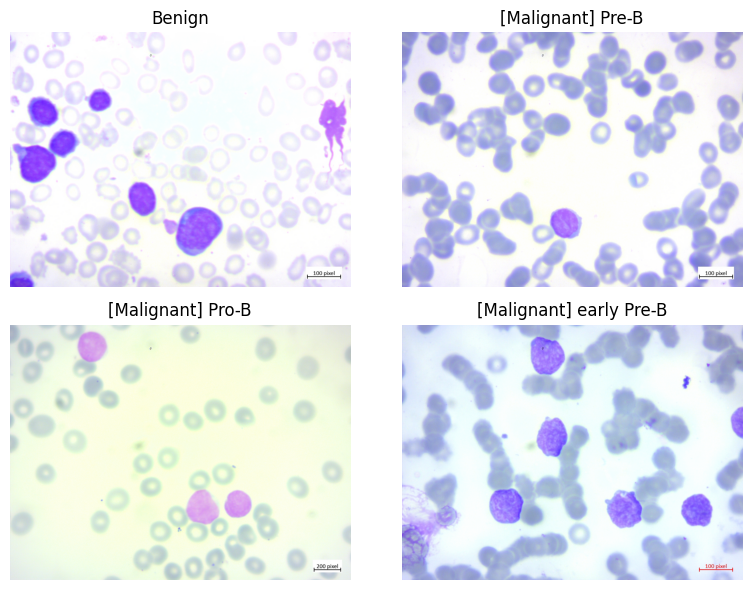

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()
for i, classe in enumerate(classes):
  img = cv2.imread(f"./dataset/{classe}/{imagens[i]}")
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  axes[i].imshow(img)
  axes[i].set_title(classe)
  axes[i].axis('off')

plt.tight_layout()
plt.show()

#**TREINANDO O MODELO**
> Treinaremos o nosso modelo Target agora utilizando um modelo pré-treinado (Source Model), o qual citamos no slide desta aula, InceptionV3, utilizando sua capacidade de reconhecimentos de características para suprir a nossa necessidade.

> _Link para a documentaçao:_ https://www.tensorflow.org/tutorials/images/transfer_learning?hl=pt-br#feature_extraction

---

In [43]:
from keras.applications import InceptionV3
def treinar_modelo(modelo, epochs):
  # Caso o treino seja interrompido por algum motivo, o estado do modelo é salvo pelo callback para que possa ser retomado posteriormente
  backup = f"./backup/{str(modelo)[10:str(modelo).index("at") - 1]}.keras"
  model_callback = keras.callbacks.BackupAndRestore(backup, save_freq="epoch", double_checkpoint=False, delete_checkpoint=False)

  # Carregando o modelo pré treinado e congelando essa base
  base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(1024, 768, 3))
  base_model.trainable = False

  inputs = keras.Input(shape=(1024, 768, 3))
  x = base_model(inputs, training=False)
  x = keras.layers.GlobalAveragePooling2D()(x)
  outputs = keras.layers.Dense(4, activation='softmax')(x)
  model = keras.Model(inputs, outputs)

  model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
  model.summary()
  history = model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=[model_callback])
  model.save(f"./modelos_treinados/{str(modelo)[10:str(modelo).index("at") - 1]}.keras")
  return (model, history)

In [44]:
modelo, history = treinar_modelo(InceptionV3, 5)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 1024, 768, 3)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 30, 22, 2048)   │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         8,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,810,980 (83.20 MB)

 Trainable params: 8,196 (32.02 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/5
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 165s 61ms/step - accuracy: 0.8358 - loss: 0.4954 - val_accuracy: 0.9689 - val_loss: 0.1214
Epoch 2/5
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 142s 57ms/step - accuracy: 0.9642 - loss: 0.1094 - val_accuracy: 0.9732 - val_loss: 0.0904
Epoch 3/5
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 144s 58ms/step - accuracy: 0.9683 - loss: 0.0865 - val_accuracy: 0.9661 - val_loss: 0.1067
Epoch 4/5
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 142s 57ms/step - accuracy: 0.9783 - loss: 0.0613 - val_accuracy: 0.9718 - val_loss: 0.0940
Epoch 5/5
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 203s 58ms/step - accuracy: 0.9822 - loss: 0.0525 - val_accuracy: 0.9689 - val_loss: 0.1059


#**FINE TUNING**

> Apesar de ser uma etapa opcional, a utilizaremos aqui para refinar nosso modelo Target após a etapa de compartilhamento de conhecimento geral, realizada no transfer learning, com o modelo InceptionV3.

---

In [45]:
from keras.models import load_model
modelo = load_model("./modelos_treinados/InceptionV3.keras")

In [46]:
modelo

<Functional name=functional_5, built=True>

In [47]:
modelo.layers[:]

[<InputLayer name=input_layer_11, built=True>,
 <Functional name=inception_v3, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling2d_5, built=True>,
 <Dense name=dense_5, built=True>]

In [48]:
# Visualizando as camadas que existem dentro do modelo base (InceptionV3)
modelo.layers[1].layers[:]

[<InputLayer name=input_layer_10, built=True>,
 <Conv2D name=conv2d_470, built=True>,
 <BatchNormalization name=batch_normalization_470, built=True>,
 <Activation name=activation_470, built=True>,
 <Conv2D name=conv2d_471, built=True>,
 <BatchNormalization name=batch_normalization_471, built=True>,
 <Activation name=activation_471, built=True>,
 <Conv2D name=conv2d_472, built=True>,
 <BatchNormalization name=batch_normalization_472, built=True>,
 <Activation name=activation_472, built=True>,
 <MaxPooling2D name=max_pooling2d_20, built=True>,
 <Conv2D name=conv2d_473, built=True>,
 <BatchNormalization name=batch_normalization_473, built=True>,
 <Activation name=activation_473, built=True>,
 <Conv2D name=conv2d_474, built=True>,
 <BatchNormalization name=batch_normalization_474, built=True>,
 <Activation name=activation_474, built=True>,
 <MaxPooling2D name=max_pooling2d_21, built=True>,
 <Conv2D name=conv2d_478, built=True>,
 <BatchNormalization name=batch_normalization_478, built=True>

In [49]:
len(modelo.layers[1].layers[:])

311

In [50]:
fine_tune_at = 261
for layer in modelo.layers[1].layers[:fine_tune_at]:
  layer.trainable = False

backup = f'./backup/finetuning_InceptionV3.keras'
model_callback = keras.callbacks.BackupAndRestore(backup, save_freq="epoch", double_checkpoint=False, delete_checkpoint=False)
modelo.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history = modelo.fit(train_ds, epochs=3, validation_data=val_ds, callbacks=[model_callback])
modelo.save("./modelos_treinados/finetuning_InceptionV3.keras")

Epoch 1/3
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 184s 61ms/step - accuracy: 0.9874 - loss: 0.0457 - val_accuracy: 0.9477 - val_loss: 0.1435
Epoch 2/3
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 179s 58ms/step - accuracy: 0.9880 - loss: 0.0398 - val_accuracy: 0.9647 - val_loss: 0.0995
Epoch 3/3
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 144s 58ms/step - accuracy: 0.9897 - loss: 0.0318 - val_accuracy: 0.9590 - val_loss: 0.1149


#**MÉTRICAS DE DESEMPENHO**


<img src="https://eailab.labmax.org/wp-content/uploads/2025/05/image-24.png" width="550">

---

In [51]:
modelo = load_model("./modelos_treinados/finetuning_InceptionV3.keras")

In [52]:
modelo.evaluate(val_ds)

708/708 ━━━━━━━━━━━━━━━━━━━━ 45s 42ms/step - accuracy: 0.9579 - loss: 0.1251


[0.11490607261657715, 0.959039568901062]

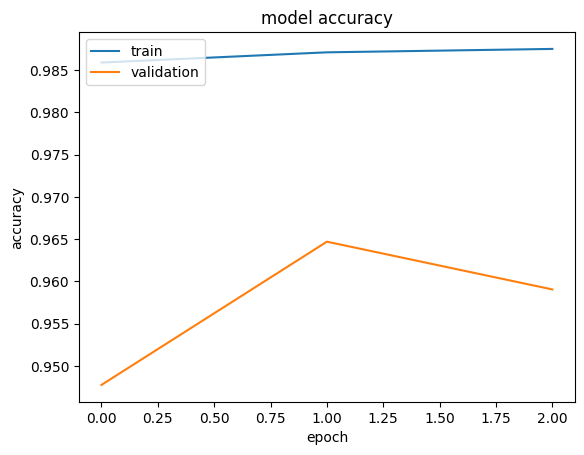

In [53]:
# Evolução da acurácia durante o treino
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

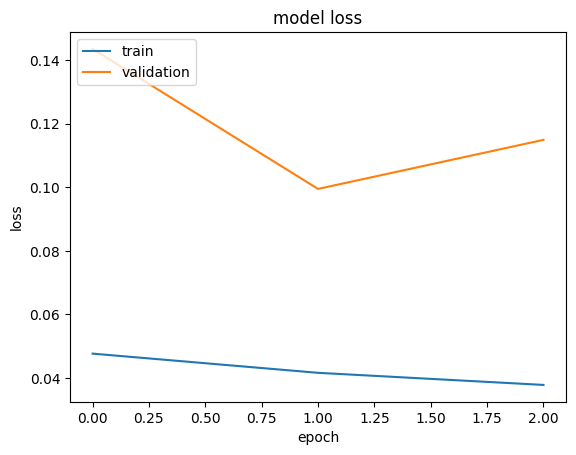

In [54]:
# Evolução da perda durante o treino
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

In [55]:
predicoes = modelo.predict(test_ds)

354/354 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step


In [56]:
# Array com as probabilidades para cada classe
predicoes[0]

array([2.0445458e-04, 1.8487547e-01, 8.1487125e-01, 4.8788610e-05],
      dtype=float32)

In [57]:
predicoes_labels = [np.argmax(i) for i in predicoes]

In [58]:
y_test = []
for x, y in test_ds:
  label = int(y.numpy()[0])
  y_test.append(label)

In [59]:
# Mostra as metricas de desempenho do teste
from sklearn.metrics import f1_score, classification_report
print(classification_report(y_test, predicoes_labels, digits=3))

              precision    recall  f1-score   support

           0      0.986     0.986     0.986        70
           1      0.892     1.000     0.943        83
           2      1.000     0.913     0.955       104
           3      0.990     0.979     0.984        97

    accuracy                          0.966       354
   macro avg      0.967     0.970     0.967       354
weighted avg      0.969     0.966     0.966       354



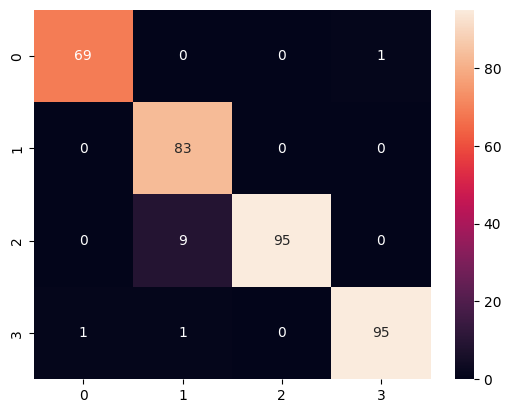

In [60]:
import seaborn as sn

# Matriz de confusão:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=predicoes_labels)
sn.heatmap(confusion_matrix, annot=True, fmt='d');